# Figure 6

This notebook produces Figure 6 and other auxiliary figures.

In [2]:
import seaborn as sns
import pandas as pd

## Get data

We load the data produced by the previous workflow stored as `../data/results/pej0_GrIS_classification.csv`. See `Fig5.ipynb` for more details.

In [3]:
df = pd.read_csv('../data/results/pej0_GrIS_classification.csv')
df

,$\frac{P_e}{\ell}$ (1/m),$J_0$ (m/yr),Speed diff (m/yr)
0,0.000021,-915.378881,3029.186179
1,0.000306,-200.805053,511.123464
2,-0.000047,-82.857761,456.284207
3,-0.000034,-450.936824,-435.655180
4,0.000078,-1243.208582,-349.572187
...,...,...,...
99,0.000234,-112.716518,613.747370
100,0.000044,-167.859915,1023.168837
101,0.000054,-1081.388452,2774.927415
102,0.000315,5.479272,467.138448


This histogram gives a quick idea about the distribution of speed change:

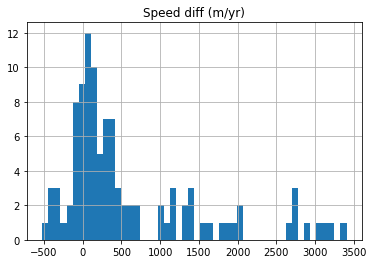

In [4]:
df.hist(column='Speed diff (m/yr)', bins=50);

## Visualization

We add a new column called `Legend` and classify the glaciers based on a simple threshold of speed change (here set to $\pm$300 m/yr):

In [5]:
newclass = []
count = 0
for idx, row in df.iterrows():
    if row['Speed diff (m/yr)'] >= 300 or row['Speed diff (m/yr)'] <= -300:
        newclass.append(r'$|\Delta V| \geq$ 300 m/yr')
        count += 1
    else:
        newclass.append(r'$|\Delta V| <$ 300 m/yr')

df['Legend'] = newclass
print('How many glaciers have a higher speed change?: {}'.format(count))
print('How many glaciers have a lower speed change?:  {}'.format(len(df) - count))

How many glaciers have a higher speed change?: 54
How many glaciers have a lower speed change?:  50


Finally, we plot **Figure 6**:

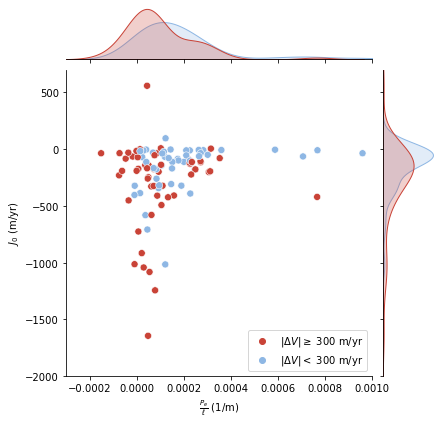

In [11]:
cmap = {r'$|\Delta V| \geq$ 300 m/yr': '#C94337', r'$|\Delta V| <$ 300 m/yr': '#8EB7E4'}
f = sns.jointplot(data=df, x=r'$\frac{P_e}{\ell}$ (1/m)', y=r'$J_0$ (m/yr)', hue="Legend", palette=cmap, joint_kws={"s": 50})
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.legend(loc='lower right')
f.savefig('../data/results/Fig6.pdf')